# **Análisis exploratorio del dataframe 2, parte 2**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

df2=pd.read_csv("df2_FGJ_CarpetasLibertad.csv", encoding='utf-8')
print(df2.columns)

#Mapeando el único valor de secuestro a plagio o secuestro:
df2.loc[df2['delito'] == 'SECUESTRO', 'delito'] = 'PLAGIO O SECUESTRO'

Index(['anio_inicio', 'mes_inicio', 'fecha_inicio', 'fecha_hecho',
       'hora_hecho', 'delito', 'categoria_delito', 'fiscalia', 'agencia',
       'unidad_investigacion', 'colonia_catalogo', 'alcaldia_hecho',
       'anio_hecho'],
      dtype='object')


# **5. Análisis del delito por colonia**


### **5.1 Top 10 colonias más peligrosas en cuanto a delitos sobre la libertad personal**

In [2]:
print(len(pd.unique(df2['colonia_catalogo'])))
print("-----------------------------------")
print(pd.unique(df2['delito']))

1105
-----------------------------------
['PRIVACION DE LA LIBERTAD PERSONAL' 'DESAPARICION FORZADA DE PERSONAS'
 'SECUESTRO EXPRESS (PARA COMETER ROBO O EXTORSIÓN)' 'PLAGIO O SECUESTRO'
 'TRAFICO DE INFANTES'
 'PRIVACION DE LA LIBERTAD PERSONAL (REALIZAR ACTO SEXUAL)'
 'PRIVACIÓN DE LA LIBERTAD PERSONAL  ( SI LIBERA DENTRO DE 24 HORAS)'
 'SECUESTRO EXTORSIVO']


colonia_catalogo
Centro               208
Morelos               75
Roma Norte            71
Agricola Oriental     59
Juarez                56
Doctores              54
Buenavista            50
Guerrero              48
Granjas Mexico        41
Del Gas               37
Name: count, dtype: int64
-----------------------------------


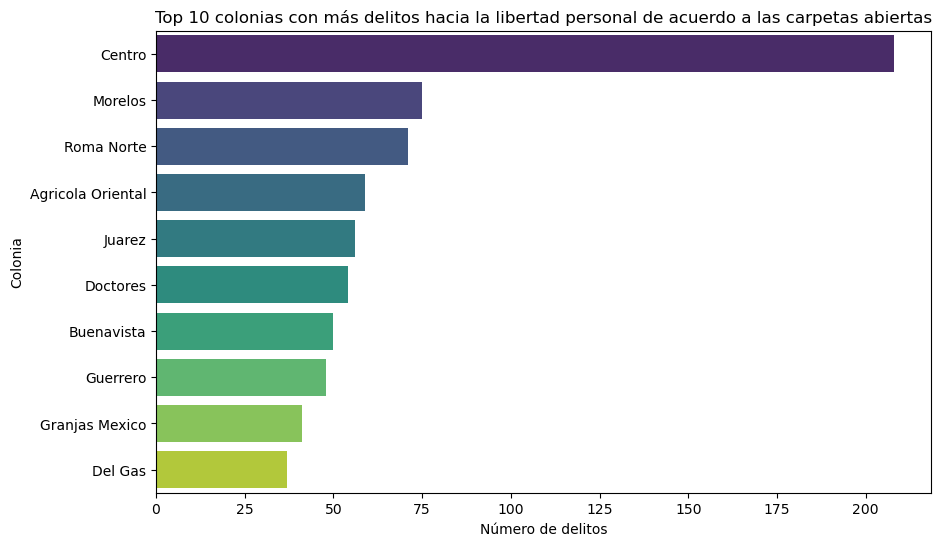

In [3]:
#Top 10 colonias que han presentado más registros de delitos en general:
top_colonias_general=df2['colonia_catalogo'].value_counts().nlargest(10)
print(top_colonias_general)
print("-----------------------------------")
df_top_colonias_general=top_colonias_general.reset_index()
df_top_colonias_general.columns = ['colonia', 'delitos']


plt.figure(figsize=(10, 6))
sns.barplot(y='colonia', x='delitos', data=df_top_colonias_general,  palette='viridis')
plt.title("Top 10 colonias con más delitos hacia la libertad personal de acuerdo a las carpetas abiertas")
plt.xlabel("Número de delitos")
plt.ylabel("Colonia")
plt.show()

### **5.2 Colonia más peligrosa para cada tipo de delito sobre la libertad personal**

In [4]:
tipo_delito=pd.unique(df2['delito'])
print(tipo_delito)
print("-----------------------------------")
print(tipo_delito.shape)

['PRIVACION DE LA LIBERTAD PERSONAL' 'DESAPARICION FORZADA DE PERSONAS'
 'SECUESTRO EXPRESS (PARA COMETER ROBO O EXTORSIÓN)' 'PLAGIO O SECUESTRO'
 'TRAFICO DE INFANTES'
 'PRIVACION DE LA LIBERTAD PERSONAL (REALIZAR ACTO SEXUAL)'
 'PRIVACIÓN DE LA LIBERTAD PERSONAL  ( SI LIBERA DENTRO DE 24 HORAS)'
 'SECUESTRO EXTORSIVO']
-----------------------------------
(8,)


In [5]:
for delito in tipo_delito:

    df_delito=df2[df2['delito'] == delito]
    df_colonias=df_delito['colonia_catalogo'].value_counts().reset_index()
    df_colonias.columns=['colonia', 'num_delitos']
    max_delitos=df_colonias['num_delitos'].max()
    colonias_maximas=df_colonias[df_colonias['num_delitos'] == max_delitos]
    print("-----------------------------------")
    print(f'La(s) colonia(s) con más registros del tipo de delito de {delito} es (son):\n{colonias_maximas}')

-----------------------------------
La(s) colonia(s) con más registros del tipo de delito de PRIVACION DE LA LIBERTAD PERSONAL es (son):
  colonia  num_delitos
0  Centro          168
-----------------------------------
La(s) colonia(s) con más registros del tipo de delito de DESAPARICION FORZADA DE PERSONAS es (son):
   colonia  num_delitos
0  Morelos            5
-----------------------------------
La(s) colonia(s) con más registros del tipo de delito de SECUESTRO EXPRESS (PARA COMETER ROBO O EXTORSIÓN) es (son):
  colonia  num_delitos
0  Centro           24
-----------------------------------
La(s) colonia(s) con más registros del tipo de delito de PLAGIO O SECUESTRO es (son):
  colonia  num_delitos
0  Centro           10
-----------------------------------
La(s) colonia(s) con más registros del tipo de delito de TRAFICO DE INFANTES es (son):
     colonia  num_delitos
0     Centro            2
1  4 Arboles            2
-----------------------------------
La(s) colonia(s) con más regi

# **6. Análisis del tipo de delito hacia la libertad personal y su asociación explícita con otros delitos en esta base de datos**

Los datos de las columnas 'agencia' y 'fiscalía' son capaces de dar indicios sobre otros delitos que se pueden asociar al de la libertad personal. Vamos a analizarlos.

### **6.1 Porcentaje de víctimas registrado para cada tipo de delito**

In [6]:
df_cuenta_delitos=df2['delito'].value_counts().reset_index()
display(df_cuenta_delitos)
print("-----------------------------------")

total_registros=len(df2)
print(total_registros)
print("-----------------------------------")


,delito,count
0,PRIVACION DE LA LIBERTAD PERSONAL,5301
1,SECUESTRO EXPRESS (PARA COMETER ROBO O EXTORSIÓN),922
2,PLAGIO O SECUESTRO,228
3,DESAPARICION FORZADA DE PERSONAS,120
4,PRIVACION DE LA LIBERTAD PERSONAL (REALIZAR AC...,57
5,TRAFICO DE INFANTES,19
6,SECUESTRO EXTORSIVO,11
7,PRIVACIÓN DE LA LIBERTAD PERSONAL ( SI LIBERA...,2


-----------------------------------
6660
-----------------------------------


In [7]:
for i in range(0,8):
    delito=df_cuenta_delitos['delito'][i]
    porcentaje=(df_cuenta_delitos['count'][i]/total_registros)*100
    print(f'El porcentaje total de los registros totales que abarca el delito de {delito} es: {porcentaje:.2f}%')

El porcentaje total de los registros totales que abarca el delito de PRIVACION DE LA LIBERTAD PERSONAL es: 79.59%
El porcentaje total de los registros totales que abarca el delito de SECUESTRO EXPRESS (PARA COMETER ROBO O EXTORSIÓN) es: 13.84%
El porcentaje total de los registros totales que abarca el delito de PLAGIO O SECUESTRO es: 3.42%
El porcentaje total de los registros totales que abarca el delito de DESAPARICION FORZADA DE PERSONAS es: 1.80%
El porcentaje total de los registros totales que abarca el delito de PRIVACION DE LA LIBERTAD PERSONAL (REALIZAR ACTO SEXUAL) es: 0.86%
El porcentaje total de los registros totales que abarca el delito de TRAFICO DE INFANTES es: 0.29%
El porcentaje total de los registros totales que abarca el delito de SECUESTRO EXTORSIVO es: 0.17%
El porcentaje total de los registros totales que abarca el delito de PRIVACIÓN DE LA LIBERTAD PERSONAL  ( SI LIBERA DENTRO DE 24 HORAS) es: 0.03%


### **6.2 Delitos sexuales asociados a delitos hacia la libertad personal**

Las agencias FDS atienden delitos sexuales, por lo que a una carpeta de investigación sobre un delito hacia la libertad personal en estas, se le asocia un delito sexual.

Hablamos de víctimas que, se infiere, también sufrieron delitos sexuales al sufrir un delito hacia la libertad personal.

In [8]:
#Numero de víctimas de privación de libertad personal para actos sexuales:
print(df2.columns)
print("-----------------------------------")
print(pd.unique(df2['agencia']))
print("-----------------------------------")
num_sexual=df2.query(' delito == "PRIVACION DE LA LIBERTAD PERSONAL (REALIZAR ACTO SEXUAL)"')['delito'].value_counts()
print(num_sexual)
print("-----------------------------------")
print(f'El número de víctimas que sufrieron privación de la libertad personal para actos sexuales es: {num_sexual[0]}')

Index(['anio_inicio', 'mes_inicio', 'fecha_inicio', 'fecha_hecho',
       'hora_hecho', 'delito', 'categoria_delito', 'fiscalia', 'agencia',
       'unidad_investigacion', 'colonia_catalogo', 'alcaldia_hecho',
       'anio_hecho'],
      dtype='object')
-----------------------------------
['UAT-AO-4' 'B' 'UAT-MH-1' 'E' '59' 'FAS' 'MH-4' 'CUH-5' 'HOM-2' 'CUH-8'
 'VC-3' 'IZP-6' 'TLP-4' 'COY-3' 'BJ-3' 'MH-2' 'C' 'D' 'BJ-1' 'CJ-1'
 'TLP-3' 'COY-4' 'GAM-8' 'AO-4' 'GAM-1' 'MC-2' 'CUH-1' 'COY-1' 'GAM-4'
 'IZP-9' 'CUH-4' 'TLP-2' 'CUH-7' 'AEAM' 'MH-1' 'VC-2' 'AZ-4' 'STCMTS'
 'AZ-1' 'IZP-10' 'VC-1' 'TUR-2' 'XO-1' 'CUH-6' 'IZP-8' 'IZP-4' 'TLP-1'
 'IZC-2' 'IZC-3' 'COY-2' 'AO-3' 'AO-1' 'CUH-2' 'VC-5' 'XO-2' '57' 'GAM-6'
 'GAM-5' 'CAPEA' 'MH-5' 'BJ-2' 'CUH-3' 'TLH-1' 'AEAMZO' 'MH-3' 'IZP-2'
 'GAM-3' 'TLH-2' 'H3' 'AZ-2' 'A' 'GAM-2' 'MIL-1' 'MC-1' 'CU' 'COY-5'
 'IZP-5' 'BJ-5' 'FDS-4' 'ORIENTEII' 'IZP-7' 'FCIH' 'STCMOB' 'AEJPA'
 'FDS-6' 'STCMZV' 'ACI' 'IZC-1' 'AO-2' 'MIL-2' 'IND' 'STCMH' 'FDS-5'
 'STCM

In [9]:
#Número de víctimas atendidas por la FDS:
num_FDS=df2['agencia'].str.contains('FDS', case=False, na=False).value_counts()
print(num_FDS)
print("-----------------------------------")
print(f'El número de víctimas atendidas por la FDS es: {num_FDS[1]}')

agencia
False    6626
True       34
Name: count, dtype: int64
-----------------------------------
El número de víctimas atendidas por la FDS es: 34


In [10]:
#Diferencia entre número de víctimas de privación de la libertad para actos sexuales y víctimas atendidas por la FDS sin esta clasificación:
diferencia=df2[(df2['delito'] != 'PRIVACION DE LA LIBERTAD PERSONAL (REALIZAR ACTO SEXUAL)') & (
    df2['agencia'].str.contains('FDS', case=False, na=False))]['agencia'].value_counts().sum()
print(f'El número de víctimas que sufrieron delitos sexuales sin catalogarse como privación de la libertad personal para actos sexuales es:  {diferencia}')

El número de víctimas que sufrieron delitos sexuales sin catalogarse como privación de la libertad personal para actos sexuales es:  11


In [11]:
total_sexual=num_sexual[0] + diferencia
print(f'El número total que se registra de víctimas que sufrieron delitos sexuales al ser privadas de la libertad es: {total_sexual}')
print("-----------------------------------")
porcentaje_sexual=(total_sexual/len(df2))*100
print(f'El porcentaje de este tipo de víctimas es: {porcentaje_sexual: .2f}%')

El número total que se registra de víctimas que sufrieron delitos sexuales al ser privadas de la libertad es: 68
-----------------------------------
El porcentaje de este tipo de víctimas es:  1.02%


### **6.3 Casos asociados con homicidio**

Las agencias como HOM-1 tratan casos con homicidios, por lo que se infiere, cuando se trata una carpeta de investigación en estas agencias, se habla de un homicidio asociado al delito hacia la libertad personal.

In [12]:
agencias_con_H=df2[df2['agencia'].str.contains('H', case=False, na=False)]
print(pd.unique(agencias_con_H['agencia']))
print("-----------------------------------")

['UAT-MH-1' 'MH-4' 'CUH-5' 'HOM-2' 'CUH-8' 'MH-2' 'CUH-1' 'CUH-4' 'CUH-7'
 'MH-1' 'CUH-6' 'CUH-2' 'MH-5' 'CUH-3' 'TLH-1' 'MH-3' 'TLH-2' 'H3' 'FCIH'
 'STCMH' 'H1' 'UAT-TLH-1' 'UAT-MH-4' 'UAT-CUH-8' 'UAT-CUH-1' 'UAT-TLH-2'
 'UAT-CUH-2' 'UAT-MH-2' 'UAT-CUH-6' 'UAT-CUH-7' 'H2']
-----------------------------------


In [13]:
homicidios=df2.query('agencia == "H1" or agencia == "H2" or agencia == "H3" or agencia == "HOM-2" or agencia == "FCIH"')['agencia'].value_counts().sum()
print(f'El número de homicidios asociados a los delitos hacia la libertad personal es: {homicidios}')
print("-----------------------------------")

porcentaje_homicidios=(homicidios/len(df2))*100
print(f'El porcentaje de este tipo de víctimas es: {porcentaje_homicidios: .2f}%')

El número de homicidios asociados a los delitos hacia la libertad personal es: 8
-----------------------------------
El porcentaje de este tipo de víctimas es:  0.12%


# **7. Análisis sobre involucrados y detenidos en el delito hacia la libertad personal:**

In [14]:
print(df2.columns)
print("-----------------------------------")
print(pd.unique(df2['unidad_investigacion']))

Index(['anio_inicio', 'mes_inicio', 'fecha_inicio', 'fecha_hecho',
       'hora_hecho', 'delito', 'categoria_delito', 'fiscalia', 'agencia',
       'unidad_investigacion', 'colonia_catalogo', 'alcaldia_hecho',
       'anio_hecho'],
      dtype='object')
-----------------------------------
['UI-1SD' '2 SIN DETENIDO' '2 CON DETENIDO 2 C/D' '1 CON DETENIDO 1 C/D'
 '3 CON DETENIDO 3 C/D' 'UI-3CD' 'UI-2SD' '5 SIN DETENIDO' 'UI-2CD'
 'UI-1CD' 'UI-3SD' 'Unidad 14' 'B-3 SIN DETENIDO' 'UI-4SD' 'Unidad 11'
 '4 SIN DETENIDO 4 S/D' 'Unidad 6' 'Unidad 9' 'Unidad 1'
 'D-6 SIN DETENIDO' 'Unidad 8' 'Unidad 3' 'Unidad 4' 'Unidad 10'
 'Unidad 2' 'Unidad 15' 'Unidad 5' 'FDS-4-01' 'B-6 SIN DETENIDO'
 'Unidad 16' 'Unidad 18' 'UI-7SD' '5 SIN DETENIDO 5 S/D' 'Unidad 7'
 'Unidad 17' '1 CON DETENIDO' 'FDS-6-03' 'Unidad 12' '4 SIN DETENIDO'
 'FDS-6-02' 'Unidad 20' '1 SIN DETENIDO' 'Unidad de investigaci¢n 7 S/D'
 '3 CON DETENIDO' 'FDS-5-03' 'Unidad 13' '3 SIN DETENIDO' 'FDS-4-03'
 'FDS-1-03' 'FDS-4-02' '2 CON D

In [15]:
#Dataframe con información sobre involucrados y detenciones, tipo de delito, alcaldía del hecho y el número de registros:
detenciones=df2[df2['unidad_investigacion'].str.contains('DETENIDO', case=False, na=False)][['unidad_investigacion', 'delito', 
                                                                                             'alcaldia_hecho']].value_counts().reset_index()
print("-----------------------------------")
display(detenciones.head())
print("-----------------------------------")
print(detenciones.shape)

-----------------------------------


,unidad_investigacion,delito,alcaldia_hecho,count
0,1 CON DETENIDO 1 C/D,PRIVACION DE LA LIBERTAD PERSONAL,IZTAPALAPA,776
1,2 CON DETENIDO 2 C/D,PRIVACION DE LA LIBERTAD PERSONAL,IZTAPALAPA,731
2,3 CON DETENIDO 3 C/D,PRIVACION DE LA LIBERTAD PERSONAL,IZTAPALAPA,646
3,2 CON DETENIDO 2 C/D,SECUESTRO EXPRESS (PARA COMETER ROBO O EXTORSIÓN),IZTAPALAPA,107
4,3 CON DETENIDO 3 C/D,SECUESTRO EXPRESS (PARA COMETER ROBO O EXTORSIÓN),IZTAPALAPA,100


-----------------------------------
(107, 4)


In [16]:
#Datos sobre involucrados y detenciones:
info_detenciones=df2[df2['unidad_investigacion'].str.contains('DETENIDO', case=False, na=False)][['unidad_investigacion', 'delito', 
                                                                                             'alcaldia_hecho']].value_counts().sum()
porcentaje_info_detenciones=(info_detenciones/len(df2))*100
print(f'El número de informes sobre involucrados y detenidos es {info_detenciones}, que representa el {porcentaje_info_detenciones: .2f}% de todas las observaciones')


El número de informes sobre involucrados y detenidos es 2871, que representa el  43.11% de todas las observaciones


### **7.1 Análisis de casos con detenidos**

In [17]:
#Dataframe con detenido(s):
detenidos=df2[df2['unidad_investigacion'].str.contains('CON DETENIDO', case=False, na=False)][['unidad_investigacion', 'delito', 
                                                                                             'alcaldia_hecho']].value_counts().reset_index()
print("-----------------------------------")
display(detenidos.head(2))
print("-----------------------------------")
print(detenidos.shape)
print("-----------------------------------")

#Registros donde hubo al menos una detención
total_detenidos=detenidos.sum()
print(f'El número total de registros donde hubo al menos un detenido es: {total_detenidos[3]}')



-----------------------------------


,unidad_investigacion,delito,alcaldia_hecho,count
0,1 CON DETENIDO 1 C/D,PRIVACION DE LA LIBERTAD PERSONAL,IZTAPALAPA,776
1,2 CON DETENIDO 2 C/D,PRIVACION DE LA LIBERTAD PERSONAL,IZTAPALAPA,731


-----------------------------------
(46, 4)
-----------------------------------
El número total de registros donde hubo al menos un detenido es: 2685


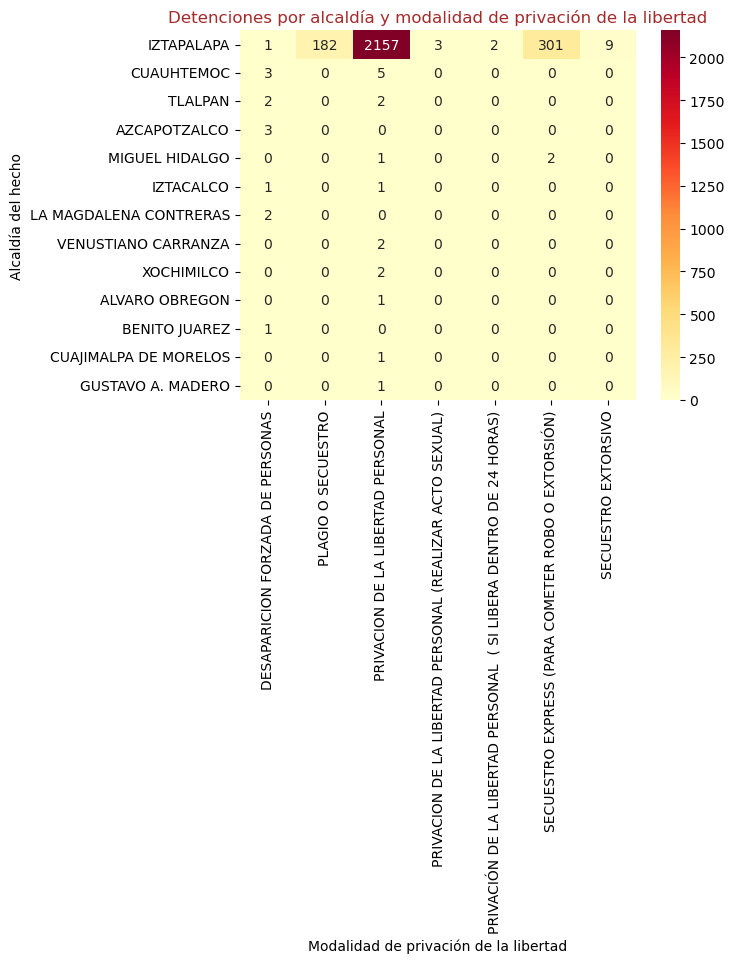

In [18]:
#Alcaldía que más presenta detenidos mediante un mapa de calor:
pivote=pd.pivot_table(detenidos, values='count', index='alcaldia_hecho', columns='delito', aggfunc='sum', fill_value=0)

pivote_ord = pivote.loc[pivote.sum(axis=1).sort_values(ascending=False).index]
sns.heatmap(pivote_ord, annot=True, fmt=".0f", cmap="YlOrRd")

plt.title("Detenciones por alcaldía y modalidad de privación de la libertad", color='brown')
plt.xlabel("Modalidad de privación de la libertad")
plt.ylabel("Alcaldía del hecho")
plt.tight_layout()
plt.show()



In [19]:
det=pivote.sum(axis=1).reset_index()
display(det)
print("-----------------------------------")

det['porcentaje']= round((det[0]/6660)*100,2)
det.columns=['alcaldia_hecho', 'registros_det', 'porcentaje_det']
print(det.columns)
print(f'El porcentaje total de registros con al menos un detenido es: {round(det['porcentaje_det'].sum(),2)}%')
print("-----------------------------------")
display(det)

,alcaldia_hecho,0
0,ALVARO OBREGON,1
1,AZCAPOTZALCO,3
2,BENITO JUAREZ,1
3,CUAJIMALPA DE MORELOS,1
4,CUAUHTEMOC,8
5,GUSTAVO A. MADERO,1
6,IZTACALCO,2
7,IZTAPALAPA,2655
8,LA MAGDALENA CONTRERAS,2
9,MIGUEL HIDALGO,3


-----------------------------------
Index(['alcaldia_hecho', 'registros_det', 'porcentaje_det'], dtype='object')
El porcentaje total de registros con al menos un detenido es: 40.34%
-----------------------------------


,alcaldia_hecho,registros_det,porcentaje_det
0,ALVARO OBREGON,1,0.02
1,AZCAPOTZALCO,3,0.05
2,BENITO JUAREZ,1,0.02
3,CUAJIMALPA DE MORELOS,1,0.02
4,CUAUHTEMOC,8,0.12
5,GUSTAVO A. MADERO,1,0.02
6,IZTACALCO,2,0.03
7,IZTAPALAPA,2655,39.86
8,LA MAGDALENA CONTRERAS,2,0.03
9,MIGUEL HIDALGO,3,0.05


### **7.2 Análisis de casos sin detenidos**

In [20]:
#Dataframe sin detenido(s):
sin_detenidos=df2[~df2['unidad_investigacion'].str.contains('CON DETENIDO', case=False, na=False)][['unidad_investigacion', 
                                                                                                         'delito', 'alcaldia_hecho']].value_counts().reset_index()
print("-----------------------------------")
display(sin_detenidos.head(2))
print("-----------------------------------")
print(sin_detenidos.shape)
print("-----------------------------------")

#Registros donde hubo al menos una detención
total_NOdetenidos=sin_detenidos.sum()
print(f'El número total de registros donde no hubo detenidos: {total_NOdetenidos [3]+2}') #2 valores NaN


-----------------------------------


,unidad_investigacion,delito,alcaldia_hecho,count
0,UI-1SD,PRIVACION DE LA LIBERTAD PERSONAL,CUAUHTEMOC,119
1,UI-1SD,PRIVACION DE LA LIBERTAD PERSONAL,BENITO JUAREZ,95


-----------------------------------
(546, 4)
-----------------------------------
El número total de registros donde no hubo detenidos: 3975


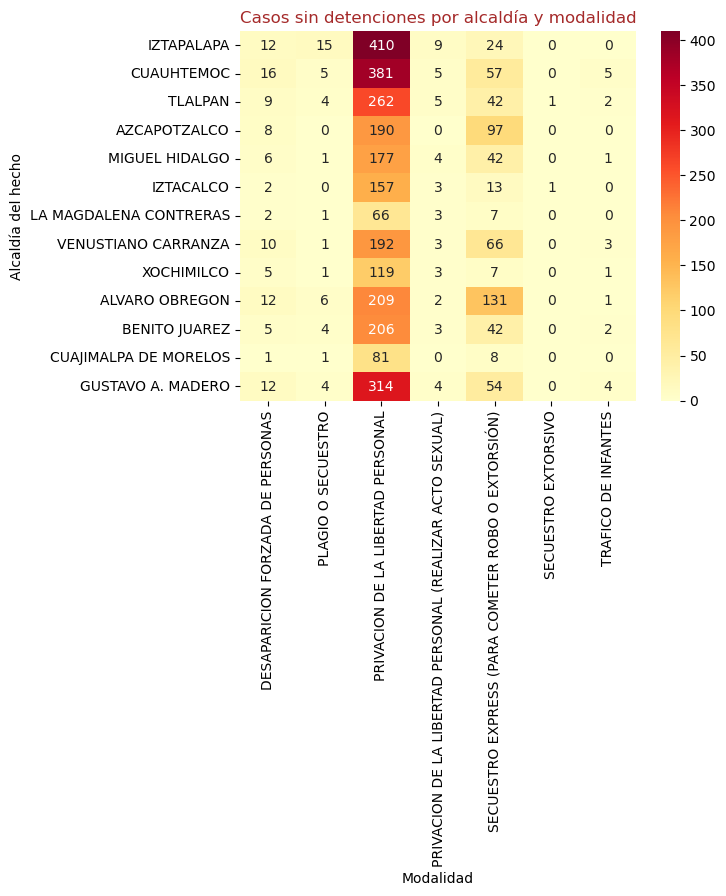

In [21]:
#Alcaldía que más presenta ausencia de detenidos mediante un mapa de calor:
pivote2=pd.pivot_table(sin_detenidos, values='count', index='alcaldia_hecho', columns='delito', aggfunc='sum', fill_value=0)

pivote_ord2=pivote2.loc[pivote.sum(axis=1).sort_values(ascending=False).index]
sns.heatmap(pivote_ord2, annot=True, fmt=".0f", cmap="YlOrRd")

plt.title("Casos sin detenciones por alcaldía y modalidad", color='brown')
plt.xlabel("Modalidad")
plt.ylabel("Alcaldía del hecho")
plt.show()

In [22]:
no_det=pivote2.sum(axis=1).reset_index()
display(no_det)
print("-----------------------------------")

no_det['porcentaje']= round((no_det[0]/6660)*100, 2)
no_det.columns=['alcaldia_hecho', 'registros_nodet', 'porcentaje_nodet']
print(f'El porcentaje total de registros sin detenciones es:{no_det['porcentaje_nodet'].sum():.2f}%')
print(no_det.columns)
print("-----------------------------------")

display(no_det)

#det=pivote.sum(axis=1).reset_index()
#display(det)
#print("-----------------------------------")

#det['porcentaje']= round((det[0]/6660)*100,2)
#det.columns=['alcaldia_hecho', 'registros_det', 'porcentaje_det']
#print(det.columns)
#print(f'El porcentaje total de registros con al menos un detenido es: {round(det['porcentaje_det'].sum(),2)}%')
#print("-----------------------------------")
#display(det)

,alcaldia_hecho,0
0,ALVARO OBREGON,361
1,AZCAPOTZALCO,295
2,BENITO JUAREZ,262
3,COYOACAN,231
4,CUAJIMALPA DE MORELOS,91
5,CUAUHTEMOC,469
6,GUSTAVO A. MADERO,392
7,IZTACALCO,176
8,IZTAPALAPA,470
9,LA MAGDALENA CONTRERAS,79


-----------------------------------
El porcentaje total de registros sin detenciones es:59.66%
Index(['alcaldia_hecho', 'registros_nodet', 'porcentaje_nodet'], dtype='object')
-----------------------------------


,alcaldia_hecho,registros_nodet,porcentaje_nodet
0,ALVARO OBREGON,361,5.42
1,AZCAPOTZALCO,295,4.43
2,BENITO JUAREZ,262,3.93
3,COYOACAN,231,3.47
4,CUAJIMALPA DE MORELOS,91,1.37
5,CUAUHTEMOC,469,7.04
6,GUSTAVO A. MADERO,392,5.89
7,IZTACALCO,176,2.64
8,IZTAPALAPA,470,7.06
9,LA MAGDALENA CONTRERAS,79,1.19


### **7.3 Índice de efectividad detenciones-casos por alcaldía**

In [23]:
#Creando el dataframe:
datos={"alcaldia_hecho":[
        "IZTAPALAPA", "CUAUHTEMOC", "GUSTAVO A. MADERO", "ALVARO OBREGON",
        "TLALPAN", "AZCAPOTZALCO", "VENUSTIANO CARRANZA", "BENITO JUAREZ",
        "MIGUEL HIDALGO", "COYOACAN", "IZTACALCO", "XOCHIMILCO",
        "TLAHUAC", "CUAJIMALPA DE MORELOS", "LA MAGDALENA CONTRERAS", "MILPA ALTA"],
    "Registros":[
        3125, 477, 393, 362,
        329, 299, 277, 263,
        234, 231, 178, 139,
        134, 92, 81, 46]}
indice=pd.DataFrame(datos)
display(indice)
print("-----------------------------------")
print(indice.shape)

,alcaldia_hecho,Registros
0,IZTAPALAPA,3125
1,CUAUHTEMOC,477
2,GUSTAVO A. MADERO,393
3,ALVARO OBREGON,362
4,TLALPAN,329
5,AZCAPOTZALCO,299
6,VENUSTIANO CARRANZA,277
7,BENITO JUAREZ,263
8,MIGUEL HIDALGO,234
9,COYOACAN,231


-----------------------------------
(16, 2)


In [24]:
print(det.shape)
print("-----------------------------------")
print(no_det.shape)
print("-----------------------------------")

#Union de dataframes indice-det
ind_det=indice.merge(det, on='alcaldia_hecho', how='outer')

ind_det.fillna(0, inplace=True)
display(ind_det)

(13, 3)
-----------------------------------
(16, 3)
-----------------------------------


,alcaldia_hecho,Registros,registros_det,porcentaje_det
0,ALVARO OBREGON,362,1.0,0.02
1,AZCAPOTZALCO,299,3.0,0.05
2,BENITO JUAREZ,263,1.0,0.02
3,COYOACAN,231,0.0,0.00
4,CUAJIMALPA DE MORELOS,92,1.0,0.02
5,CUAUHTEMOC,477,8.0,0.12
6,GUSTAVO A. MADERO,393,1.0,0.02
7,IZTACALCO,178,2.0,0.03
8,IZTAPALAPA,3125,2655.0,39.86
9,LA MAGDALENA CONTRERAS,81,2.0,0.03


In [25]:
#Índice de efectividad
ind_det['efectividad']=round((ind_det['registros_det'] / ind_det['Registros'])*100,2)
display(ind_det)
print("-----------------------------------")
display(ind_det[['alcaldia_hecho', 'efectividad']].sort_values(by='efectividad', ascending=False))

,alcaldia_hecho,Registros,registros_det,porcentaje_det,efectividad
0,ALVARO OBREGON,362,1.0,0.02,0.28
1,AZCAPOTZALCO,299,3.0,0.05,1.00
2,BENITO JUAREZ,263,1.0,0.02,0.38
3,COYOACAN,231,0.0,0.00,0.00
4,CUAJIMALPA DE MORELOS,92,1.0,0.02,1.09
5,CUAUHTEMOC,477,8.0,0.12,1.68
6,GUSTAVO A. MADERO,393,1.0,0.02,0.25
7,IZTACALCO,178,2.0,0.03,1.12
8,IZTAPALAPA,3125,2655.0,39.86,84.96
9,LA MAGDALENA CONTRERAS,81,2.0,0.03,2.47


-----------------------------------


,alcaldia_hecho,efectividad
8,IZTAPALAPA,84.96
9,LA MAGDALENA CONTRERAS,2.47
5,CUAUHTEMOC,1.68
15,XOCHIMILCO,1.44
10,MIGUEL HIDALGO,1.28
13,TLALPAN,1.22
7,IZTACALCO,1.12
4,CUAJIMALPA DE MORELOS,1.09
1,AZCAPOTZALCO,1.00
14,VENUSTIANO CARRANZA,0.72


### **7.4 Involucrados en el delito por modalidad**

In [26]:
#Dataframe para involucrados por modalidad
involucrados=df2[df2['unidad_investigacion'].str.contains('DETENIDO', case=False, na=False)][['unidad_investigacion', 'delito']]
print(pd.unique(involucrados['unidad_investigacion']))
print("-----------------------------------")

#Observamos información ambigua en cuanto a involucrados, por lo cual nos quedamos únicamente con la información explícita
#involucrados=involucrados.query(    'unidad_investigacion == "2 SIN DETENIDO"  or   ')
no_ambiguos=['2 SIN DETENIDO', '2 CON DETENIDO 2 C/D', '1 CON DETENIDO 1 C/D', '3 CON DETENIDO 3 C/D', '5 SIN DETENIDO', '4 SIN DETENIDO 4 S/D', '5 SIN DETENIDO 5 S/D', 
            '1 CON DETENIDO', '4 SIN DETENIDO', '1 SIN DETENIDO', '3 CON DETENIDO', '3 SIN DETENIDO', '2 CON DETENIDO']

involucrados=involucrados[involucrados['unidad_investigacion'].isin (no_ambiguos)]
print(pd.unique(involucrados['unidad_investigacion']))
print("-----------------------------------")
display(involucrados.head())

['2 SIN DETENIDO' '2 CON DETENIDO 2 C/D' '1 CON DETENIDO 1 C/D'
 '3 CON DETENIDO 3 C/D' '5 SIN DETENIDO' 'B-3 SIN DETENIDO'
 '4 SIN DETENIDO 4 S/D' 'D-6 SIN DETENIDO' 'B-6 SIN DETENIDO'
 '5 SIN DETENIDO 5 S/D' '1 CON DETENIDO' '4 SIN DETENIDO' '1 SIN DETENIDO'
 '3 CON DETENIDO' '3 SIN DETENIDO' '2 CON DETENIDO' 'B-1 SIN DETENIDO'
 'UNIDAD 1 SIN DETENIDO']
-----------------------------------
['2 SIN DETENIDO' '2 CON DETENIDO 2 C/D' '1 CON DETENIDO 1 C/D'
 '3 CON DETENIDO 3 C/D' '5 SIN DETENIDO' '4 SIN DETENIDO 4 S/D'
 '5 SIN DETENIDO 5 S/D' '1 CON DETENIDO' '4 SIN DETENIDO' '1 SIN DETENIDO'
 '3 CON DETENIDO' '3 SIN DETENIDO' '2 CON DETENIDO']
-----------------------------------


,unidad_investigacion,delito
1,2 SIN DETENIDO,PRIVACION DE LA LIBERTAD PERSONAL
3,2 CON DETENIDO 2 C/D,PRIVACION DE LA LIBERTAD PERSONAL
4,1 CON DETENIDO 1 C/D,PRIVACION DE LA LIBERTAD PERSONAL
5,3 CON DETENIDO 3 C/D,PRIVACION DE LA LIBERTAD PERSONAL
6,3 CON DETENIDO 3 C/D,PRIVACION DE LA LIBERTAD PERSONAL


In [27]:
#Manipulación de las expresiones regulares
involucrados['numero_involucrados']=involucrados['unidad_investigacion'].str[0]
display(involucrados.head())
print("-----------------------------------")
print(involucrados.isna().sum())
print("-----------------------------------")
print(involucrados.dtypes)
print("-----------------------------------")

#De formato object a int para el número de involucrados
involucrados['numero_involucrados']=involucrados['numero_involucrados'].astype('Int64')
print(involucrados.dtypes)

,unidad_investigacion,delito,numero_involucrados
1,2 SIN DETENIDO,PRIVACION DE LA LIBERTAD PERSONAL,2
3,2 CON DETENIDO 2 C/D,PRIVACION DE LA LIBERTAD PERSONAL,2
4,1 CON DETENIDO 1 C/D,PRIVACION DE LA LIBERTAD PERSONAL,1
5,3 CON DETENIDO 3 C/D,PRIVACION DE LA LIBERTAD PERSONAL,3
6,3 CON DETENIDO 3 C/D,PRIVACION DE LA LIBERTAD PERSONAL,3


-----------------------------------
unidad_investigacion    0
delito                  0
numero_involucrados     0
dtype: int64
-----------------------------------
unidad_investigacion    object
delito                  object
numero_involucrados     object
dtype: object
-----------------------------------
unidad_investigacion    object
delito                  object
numero_involucrados      Int64
dtype: object


In [66]:
#Agrupación
agrupados=involucrados.groupby('delito')['numero_involucrados'].value_counts().reset_index()
agrupados.rename(columns={'count': 'casos'}, inplace=True)
display(agrupados)
print(agrupados.shape)
print("-----------------------------------")

#Cuentas por modalidad
total_modalidad=agrupados.groupby('delito')['casos'].sum().reset_index()
total_modalidad.rename(columns={'casos': 'cuenta_total'}, inplace=True)
display(total_modalidad)
print(total_modalidad.shape)

,delito,numero_involucrados,casos
0,DESAPARICION FORZADA DE PERSONAS,1,13
1,DESAPARICION FORZADA DE PERSONAS,3,10
2,DESAPARICION FORZADA DE PERSONAS,2,9
3,DESAPARICION FORZADA DE PERSONAS,4,8
4,DESAPARICION FORZADA DE PERSONAS,5,6
5,PLAGIO O SECUESTRO,2,72
6,PLAGIO O SECUESTRO,1,58
7,PLAGIO O SECUESTRO,3,52
8,PRIVACION DE LA LIBERTAD PERSONAL,1,888
9,PRIVACION DE LA LIBERTAD PERSONAL,2,746


(24, 3)
-----------------------------------


,delito,cuenta_total
0,DESAPARICION FORZADA DE PERSONAS,46
1,PLAGIO O SECUESTRO,182
2,PRIVACION DE LA LIBERTAD PERSONAL,2316
3,PRIVACION DE LA LIBERTAD PERSONAL (REALIZAR AC...,4
4,PRIVACIÓN DE LA LIBERTAD PERSONAL ( SI LIBERA...,2
5,SECUESTRO EXPRESS (PARA COMETER ROBO O EXTORSIÓN),304
6,SECUESTRO EXTORSIVO,9


(7, 2)


In [67]:
#Frecuencia del número de involucrados de acuerdo a la modalidad
# Hacemos merge por 'delito'
agrupados = agrupados.merge(total_modalidad, on='delito')

# Ahora agrupados tendrá:
# delito | numero_involucrados | count | count_total

# Calculamos el porcentaje
agrupados['porcentaje'] = round((agrupados['casos'] / agrupados['cuenta_total']) * 100, 2)
display(agrupados)

,delito,numero_involucrados,casos,cuenta_total,porcentaje
0,DESAPARICION FORZADA DE PERSONAS,1,13,46,28.26
1,DESAPARICION FORZADA DE PERSONAS,3,10,46,21.74
2,DESAPARICION FORZADA DE PERSONAS,2,9,46,19.57
3,DESAPARICION FORZADA DE PERSONAS,4,8,46,17.39
4,DESAPARICION FORZADA DE PERSONAS,5,6,46,13.04
5,PLAGIO O SECUESTRO,2,72,182,39.56
6,PLAGIO O SECUESTRO,1,58,182,31.87
7,PLAGIO O SECUESTRO,3,52,182,28.57
8,PRIVACION DE LA LIBERTAD PERSONAL,1,888,2316,38.34
9,PRIVACION DE LA LIBERTAD PERSONAL,2,746,2316,32.21


# **8. Análisis de fechas: relación de la fecha del hecho y la fecha de inicio de la carpeta de investigación**

Se buscará observar patrones temporales en la diferencia de fechas y ver si de alguna manera afecta a la detención.

Recordemos que en la primera parte de este EDA hablamos de observaciones que podrían sesgar el clustering, por ello solo tomamos las de entre 2016 y 2024. También en este caso hay datos que pueden sesgar el promedio de días transcurridos entre fecha del hecho y fecha de la apertura de la carpeta, de acuerdo a los registros.



In [29]:
#Fechas a datetime y enteros:
df2['fecha_inicio'] = pd.to_datetime(df2['fecha_inicio'], format='mixed', errors='coerce')
df2['fecha_hecho'] = pd.to_datetime(df2['fecha_hecho'], format='mixed', errors='coerce')
df2['anio_hecho'] = df2['anio_hecho'].astype('Int64')

print(df2.dtypes)
print("-----------------------------------")
print(df2.columns)

anio_inicio                      int64
mes_inicio                      object
fecha_inicio            datetime64[ns]
fecha_hecho             datetime64[ns]
hora_hecho                      object
delito                          object
categoria_delito                object
fiscalia                        object
agencia                         object
unidad_investigacion            object
colonia_catalogo                object
alcaldia_hecho                  object
anio_hecho                       Int64
dtype: object
-----------------------------------
Index(['anio_inicio', 'mes_inicio', 'fecha_inicio', 'fecha_hecho',
       'hora_hecho', 'delito', 'categoria_delito', 'fiscalia', 'agencia',
       'unidad_investigacion', 'colonia_catalogo', 'alcaldia_hecho',
       'anio_hecho'],
      dtype='object')


In [30]:
#Columna nueva con la diferencia de días
df2['dias_hecho_carpeta']=(df2['fecha_inicio'] - df2['fecha_hecho']).dt.days.astype('Int64')
display(df2.head())
print(df2.dtypes)

#Tratamiento del valor negativo mapeado a positivo
df2.loc[(df2['delito'] == 'PRIVACION DE LA LIBERTAD PERSONAL') & (df2['dias_hecho_carpeta'] < 0), 'dias_hecho_carpeta'] = 1

,anio_inicio,mes_inicio,fecha_inicio,fecha_hecho,hora_hecho,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,colonia_catalogo,alcaldia_hecho,anio_hecho,dias_hecho_carpeta
0,2024,Agosto,2024-08-31,1975-01-30,06:00:00,PRIVACION DE LA LIBERTAD PERSONAL,DELITO DE BAJO IMPACTO,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN ALVAR...,UAT-AO-4,UI-1SD,San Angel,ALVARO OBREGON,1975,18111
1,2023,Enero,2023-01-20,1995-10-01,16:30:00,PRIVACION DE LA LIBERTAD PERSONAL,DELITO DE BAJO IMPACTO,FISCALÍA DE INVESTIGACIÓN Y PERSECUCIÓN DE LOS...,B,2 SIN DETENIDO,Bosque De Chapultepec I Seccion,MIGUEL HIDALGO,1995,9973
2,2022,Abril,2022-04-11,1997-07-21,08:00:00,PRIVACION DE LA LIBERTAD PERSONAL,DELITO DE BAJO IMPACTO,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN MIGUE...,UAT-MH-1,UI-1SD,Santo Tomas,MIGUEL HIDALGO,1997,9030
3,2017,Marzo,2017-03-10,2001-03-10,06:30:00,PRIVACION DE LA LIBERTAD PERSONAL,DELITO DE BAJO IMPACTO,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE S...,E,2 CON DETENIDO 2 C/D,Constitucion De La Republica,IZTAPALAPA,2001,5844
4,2021,Marzo,2021-03-15,2001-03-15,21:00:00,PRIVACION DE LA LIBERTAD PERSONAL,DELITO DE BAJO IMPACTO,FISCALÍA DE INVESTIGACIÓN DEL DELITO DE SECUESTRO,E,1 CON DETENIDO 1 C/D,Las Cruces,IZTAPALAPA,2001,7305


anio_inicio                      int64
mes_inicio                      object
fecha_inicio            datetime64[ns]
fecha_hecho             datetime64[ns]
hora_hecho                      object
delito                          object
categoria_delito                object
fiscalia                        object
agencia                         object
unidad_investigacion            object
colonia_catalogo                object
alcaldia_hecho                  object
anio_hecho                       Int64
dias_hecho_carpeta               Int64
dtype: object


### **8.1 Promedio total de días transcurridos entre la fecha del hecho, partiendo desde 2016, y la fecha de inicio de la carpeta, para registros desde enero 2016**

In [31]:
#Filtrando:
df_16_24=df2.query('anio_hecho >= 2016 and anio_hecho <= 2024')
display(df_16_24.head(2))
print("-----------------------------------")
print(f'Fecha de apertura de carpeta más antigua: {df_16_24['fecha_inicio'].min()}')
print(f'Fecha de apertura de carpeta más reciente: {df_16_24['fecha_inicio'].max()}')
print("-----------------------------------")

,anio_inicio,mes_inicio,fecha_inicio,fecha_hecho,hora_hecho,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,colonia_catalogo,alcaldia_hecho,anio_hecho,dias_hecho_carpeta
60,2016,Enero,2016-01-03,2016-01-02,05:00:00,PRIVACION DE LA LIBERTAD PERSONAL,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN VENUSTIANO CARRANZA,VC-3,UI-1CD,Arenal Puerto Aereo,VENUSTIANO CARRANZA,2016,1
61,2016,Enero,2016-01-04,2016-01-03,00:30:00,PRIVACION DE LA LIBERTAD PERSONAL,DELITO DE BAJO IMPACTO,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE S...,FAS,UI-3CD,Tabacalera,CUAUHTEMOC,2016,1


-----------------------------------
Fecha de apertura de carpeta más antigua: 2016-01-03 00:00:00
Fecha de apertura de carpeta más reciente: 2025-01-26 20:10:41
-----------------------------------


In [32]:
dias_promedio_diferencia=round(df_16_24['dias_hecho_carpeta'].mean(),1)
print(f'El número de días promedio que tarda una víctima en abrir una carpeta de investigación con respecto al día de ocurrencia del delito es de: {dias_promedio_diferencia} días')

El número de días promedio que tarda una víctima en abrir una carpeta de investigación con respecto al día de ocurrencia del delito es de: 24.3 días


### **8.2 Promedio de días transcurridos entre la fecha del hecho y la fecha de inicio de la carpeta por alcaldía:**

In [33]:
promedio_alcaldia=round(df_16_24.groupby('alcaldia_hecho')['dias_hecho_carpeta'].mean().sort_values(ascending=False), 2)
display(promedio_alcaldia)

alcaldia_hecho
MILPA ALTA                47.98
CUAJIMALPA DE MORELOS     40.96
IZTACALCO                 39.61
BENITO JUAREZ             34.13
TLALPAN                   31.09
XOCHIMILCO                30.87
ALVARO OBREGON             30.2
CUAUHTEMOC                 29.5
TLAHUAC                   26.97
GUSTAVO A. MADERO         24.04
LA MAGDALENA CONTRERAS    22.16
IZTAPALAPA                21.69
VENUSTIANO CARRANZA       19.21
COYOACAN                  18.59
MIGUEL HIDALGO            18.07
AZCAPOTZALCO              13.79
Name: dias_hecho_carpeta, dtype: Float64

In [34]:
print(round(promedio_alcaldia.mean(),2))

28.05


### **8.3 Promedio de días transcurridos entre la fecha del hecho y la fecha de inicio de la carpeta por modalidad del delito:**

Como se presenta un outlier en Iztapalapa, se tomará en cuenta la correlación de Spearman.

In [35]:
promedio_por_delito=df_16_24.groupby('delito')['dias_hecho_carpeta'].mean().sort_values(ascending=False)
display(promedio_por_delito)

delito
DESAPARICION FORZADA DE PERSONAS                                      193.741379
PRIVACION DE LA LIBERTAD PERSONAL (REALIZAR ACTO SEXUAL)               72.982456
TRAFICO DE INFANTES                                                    40.263158
PRIVACION DE LA LIBERTAD PERSONAL                                      23.494739
PLAGIO O SECUESTRO                                                     10.502222
SECUESTRO EXPRESS (PARA COMETER ROBO O EXTORSIÓN)                        8.18716
PRIVACIÓN DE LA LIBERTAD PERSONAL  ( SI LIBERA DENTRO DE 24 HORAS)           2.0
SECUESTRO EXTORSIVO                                                     0.090909
Name: dias_hecho_carpeta, dtype: Float64

### **8.4 Correlación:**

In [36]:
#Dataframe de efectividad en detenciones por alcaldía:
efectividad=ind_det[['alcaldia_hecho', 'efectividad']].sort_values(by='efectividad', ascending=False)
efectividad['efectividad']=efectividad['efectividad'] /100
display(efectividad.head(3))
print("-----------------------------------")

#Dataframe de promedio de días transcurridos hecho-carpeta por alcaldía:
dias=promedio_alcaldia.reset_index()
display(dias.head(3))
print("-----------------------------------")

#Unión de los dataframes:
correlacion=pd.merge(efectividad, dias, on='alcaldia_hecho')
display(correlacion)

,alcaldia_hecho,efectividad
8,IZTAPALAPA,0.8496
9,LA MAGDALENA CONTRERAS,0.0247
5,CUAUHTEMOC,0.0168


-----------------------------------


,alcaldia_hecho,dias_hecho_carpeta
0,MILPA ALTA,47.98
1,CUAJIMALPA DE MORELOS,40.96
2,IZTACALCO,39.61


-----------------------------------


,alcaldia_hecho,efectividad,dias_hecho_carpeta
0,IZTAPALAPA,0.8496,21.69
1,LA MAGDALENA CONTRERAS,0.0247,22.16
2,CUAUHTEMOC,0.0168,29.5
3,XOCHIMILCO,0.0144,30.87
4,MIGUEL HIDALGO,0.0128,18.07
5,TLALPAN,0.0122,31.09
6,IZTACALCO,0.0112,39.61
7,CUAJIMALPA DE MORELOS,0.0109,40.96
8,AZCAPOTZALCO,0.0100,13.79
9,VENUSTIANO CARRANZA,0.0072,19.21


In [37]:
#Correlación de Pearson
pearson=correlacion[['efectividad', 'dias_hecho_carpeta']].corr(method='pearson')
display('El coeficiente de correlación de Pearson es:', pearson)
print("-----------------------------------")

#Correlación de Spearman
spearman=correlacion[['efectividad', 'dias_hecho_carpeta']].corr(method='spearman')
display("El coeficiente de correlación de Spearman es:", spearman)



'El coeficiente de correlación de Pearson es:'

,efectividad,dias_hecho_carpeta
efectividad,1.000000,-0.185553
dias_hecho_carpeta,-0.185553,1.000000


-----------------------------------


'El coeficiente de correlación de Spearman es:'

,efectividad,dias_hecho_carpeta
efectividad,1.000000,-0.117995
dias_hecho_carpeta,-0.117995,1.000000


In [38]:
# Filtramos sin Iztapalapa
df_sin_izta = correlacion[correlacion['alcaldia_hecho'] != 'IZTAPALAPA']

# Pearson
pearson_sin_izta = df_sin_izta[['efectividad', 'dias_hecho_carpeta']].corr(method='pearson')
print("Correlación de Pearson sin Iztapalapa:\n", pearson_sin_izta)

# Spearman
spearman_sin_izta = df_sin_izta[['efectividad', 'dias_hecho_carpeta']].corr(method='spearman')
print("\nCorrelación de Spearman sin Iztapalapa:\n", spearman_sin_izta)

Correlación de Pearson sin Iztapalapa:
                     efectividad  dias_hecho_carpeta
efectividad            1.000000           -0.149303
dias_hecho_carpeta    -0.149303            1.000000

Correlación de Spearman sin Iztapalapa:
                     efectividad  dias_hecho_carpeta
efectividad            1.000000           -0.053764
dias_hecho_carpeta    -0.053764            1.000000


### **8.4 Análisis por días semanales mediante una tabla de datos cruzados:**

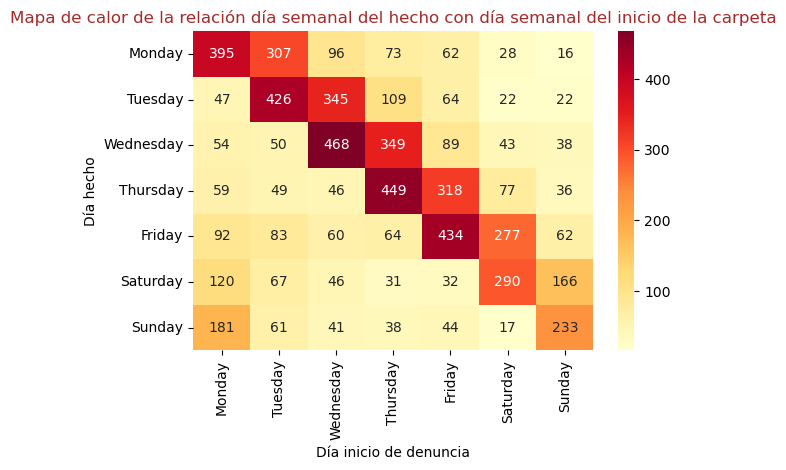

In [39]:
df_16_24['dia_hecho']=df_16_24['fecha_hecho'].dt.day_name()
df_16_24['dia_denuncia']=df_16_24['fecha_inicio'].dt.day_name()

#Tabla cruzada:
tabla_cruzada=pd.crosstab(df_16_24['dia_hecho'], df_16_24['dia_denuncia'])
orden_dias=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] #En inglés por Pandas
tabla_cruzada=tabla_cruzada.reindex(index=orden_dias, columns=orden_dias)

sns.heatmap(tabla_cruzada, annot=True, fmt="d", cmap="YlOrRd")
plt.title('Mapa de calor de la relación día semanal del hecho con día semanal del inicio de la carpeta', color='brown')
plt.xlabel('Día inicio de denuncia')
plt.ylabel('Día hecho')
plt.tight_layout()
plt.show()